##### Download the datasets


In [109]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

t = zipfile.ZipFile("pizza_steak.zip","r")
t.extractall()
t.close()

--2023-08-17 08:22:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   213MB/s    in 0.5s    

2023-08-17 08:22:26 (213 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [110]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

# View the datasets

In [111]:
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import os

In [112]:
train_dir = "pizza_steak/train"
path1 = "pizza_steak/train/pizza"
path2 = "pizza_steak/train/steak"

In [113]:
for  dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"No of files present in {dirpath} is {len(filenames)}")

No of files present in pizza_steak is 0
No of files present in pizza_steak/test is 0
No of files present in pizza_steak/test/pizza is 250
No of files present in pizza_steak/test/steak is 250
No of files present in pizza_steak/train is 0
No of files present in pizza_steak/train/pizza is 750
No of files present in pizza_steak/train/steak is 750


In [114]:
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names  = np.array(sorted([files.name for files in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

**Data Visualization**

In [115]:
import matplotlib.image as mpimg

def viewData(path1, path2):
  plt.figure(figsize=(7,13))
  plt.subplot(1,2,1)
  path1 = path1 + "/" + rd.sample(os.listdir(f"{path1}"),1)[0]
  plt.title(f"{path1}", fontsize=7)
  sel1 = mpimg.imread(path1)
  plt.xlabel(f"Dim {sel1.shape}")
  plt.imshow(sel1)

  plt.subplot(1,2,2)
  path2  = path2 + "/" + rd.sample(os.listdir(f"{path2}"),1)[0]
  plt.title(f"{path2}", fontsize=7)
  sel2 = mpimg.imread(path2)
  plt.xlabel(f"Dim {sel2.shape}")
  plt.imshow(sel2)


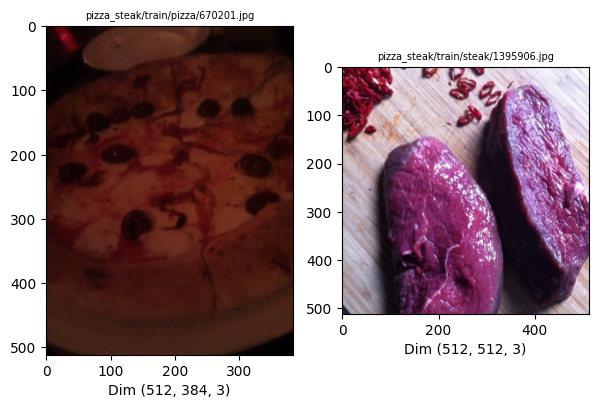

In [116]:
viewData(path1 = path1, path2 = path2)

In [117]:
def imgData(_path):
  return mpimg.imread(f"{_path}/" + os.listdir(f"{_path}")[0])

In [118]:
imgData(path2)

array([[[ 90,  69,  38],
        [ 90,  69,  38],
        [ 95,  72,  40],
        ...,
        [110,  94,  78],
        [ 61,  45,  29],
        [ 37,  21,   5]],

       [[100,  79,  48],
        [ 99,  78,  47],
        [104,  81,  50],
        ...,
        [119, 102,  84],
        [ 74,  57,  41],
        [ 43,  26,   8]],

       [[100,  79,  50],
        [ 98,  77,  46],
        [100,  77,  46],
        ...,
        [132, 114,  94],
        [ 93,  74,  57],
        [ 51,  33,  13]],

       ...,

       [[  7,  13,   9],
        [  8,  13,   7],
        [ 12,  13,   7],
        ...,
        [ 48,  36,  12],
        [ 46,  34,  10],
        [ 48,  36,  12]],

       [[  9,  14,   8],
        [ 10,  15,   9],
        [ 14,  15,   9],
        ...,
        [ 40,  28,   4],
        [ 40,  30,   5],
        [ 49,  39,  14]],

       [[  9,  14,   8],
        [ 14,  17,  10],
        [ 16,  17,  11],
        ...,
        [ 47,  35,  11],
        [ 46,  36,  11],
        [ 43,  33,   8]]

In [119]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input

#### **Model 1**

In [120]:
train_path = "pizza_steak/train"
test_path = "pizza_steak/test"

In [121]:
# Set seed
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_path,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(test_path,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


##### Code for the Model




In [122]:
tf.random.set_seed(42)

model1 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(filters=10,
           kernel_size=(3,3),
           activation="relu"), # No need to mention the shape (if you want then 224-2, 224-2,10)
    MaxPool2D(pool_size=2,
              padding="valid"), # Valid = no padding
    Conv2D(filters=10,
           kernel_size=(3,3),
           activation="relu"),
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu"),
    MaxPool2D(pool_size=(2,2),
              padding="valid"), # Default
  Flatten(),
  Dense(1,activation="sigmoid")  # max(0,x)
    ])


model1.compile(loss="binary_crossentropy",
               optimizer = tf.optimizers.Adam(),
               metrics=["accuracy"])

history1 =model1.fit(
    train_data, # Normalized Data
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps=len(valid_data)
)


Epoch 1/5
47/47 [==============================] - 9s 135ms/step - loss: 0.5667 - accuracy: 0.7007 - val_loss: 0.4574 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 13s 273ms/step - loss: 0.4911 - accuracy: 0.7680 - val_loss: 0.4021 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 7s 160ms/step - loss: 0.4196 - accuracy: 0.8060 - val_loss: 0.4446 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3936 - accuracy: 0.8227 - val_loss: 0.3340 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 8s 165ms/step - loss: 0.3606 - accuracy: 0.8493 - val_loss: 0.3448 - val_accuracy: 0.8360


In [123]:
len(train_data)* 32

1504

In [124]:
model1.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_27 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_29 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

<Axes: title={'center': 'Model 1'}>

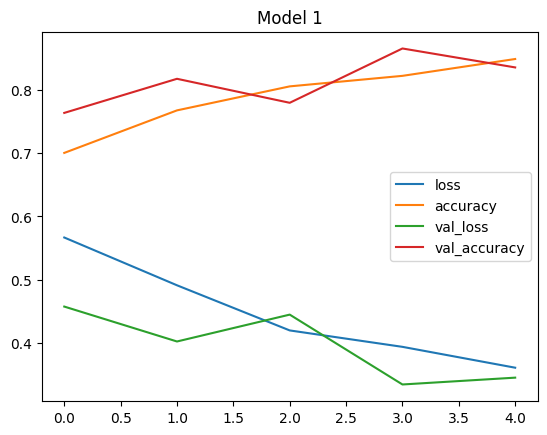

In [125]:
import pandas as pd
pd.DataFrame(history1.history).plot(title="Model 1")

In [126]:
tf.random.set_seed(42)

data_gen1 = ImageDataGenerator(rescale=1/255.,
                               rotation_range = 20,
                               shear_range=0.2,
                               width_shift_range=0.2,
                               height_shift_range=0.2)
train_data1 = data_gen1.flow_from_directory(train_path,
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            seed=42)
model2 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           activation="relu",  # max(0,x)
           input_shape=(224,224,3)),
    Conv2D(filters=10,
           kernel_size=(3,3),
           activation="relu"), # No need to mention the shape (if you want then 224-2, 224-2,10)
    MaxPool2D(pool_size=2,
              padding="valid"), # Valid = no padding
    Conv2D(filters=10,
           kernel_size=(3,3),
           activation="relu"),
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu"),
    MaxPool2D(pool_size=(2,2),
              padding="valid"), # Default
  Flatten(),
  Dense(1,activation="sigmoid")
    ])


model2.compile(loss="binary_crossentropy",
               optimizer = tf.optimizers.Adam(),
               metrics=["accuracy"])

history2 =model2.fit(
    train_data1, # Normalized Data
    epochs = 5,
    steps_per_epoch = len(train_data1),
    validation_data = valid_data,
    validation_steps=len(valid_data)
)


Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 447ms/step - loss: 0.6133 - accuracy: 0.6507 - val_loss: 0.4191 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 21s 451ms/step - loss: 0.5224 - accuracy: 0.7467 - val_loss: 0.4021 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 21s 450ms/step - loss: 0.4838 - accuracy: 0.7907 - val_loss: 0.3574 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 21s 439ms/step - loss: 0.4795 - accuracy: 0.7813 - val_loss: 0.3881 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4624 - accuracy: 0.7833 - val_loss: 0.4543 - val_accuracy: 0.7940


In [127]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_31 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_33 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

<Axes: title={'center': 'Model -2'}>

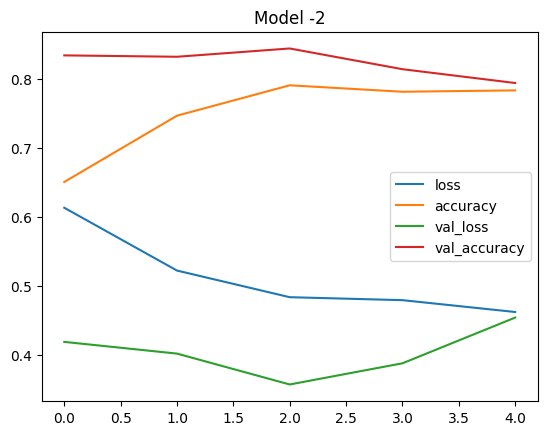

In [128]:
pd.DataFrame(history2.history).plot(title="Model -2")

## Binary Classification for the food vision


In [129]:
tf.random.set_seed(42)

# Adding More layers to increase the throughput
model3 = Sequential([
    Flatten(input_shape=(224,224,3)),
    Dense(100,activation="relu"),
    Dense(100,activation="relu"),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

model3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history3 = model3.fit(train_data,
           epochs=5,
           batch_size=32,
           steps_per_epoch=len(train_data),
           validation_data = valid_data,
           validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 139ms/step - loss: 2.3639 - accuracy: 0.6353 - val_loss: 1.0582 - val_accuracy: 0.6180
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6836 - accuracy: 0.7280 - val_loss: 0.5550 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.7278 - accuracy: 0.7180 - val_loss: 0.4845 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4569 - accuracy: 0.8027 - val_loss: 0.5213 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4884 - accuracy: 0.7807 - val_loss: 0.4418 - val_accuracy: 0.7840


In [130]:
model3.summary() # has high trainable params but performing worse than our mode1

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 100)               15052900  
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


<Axes: title={'center': 'Model 3'}>

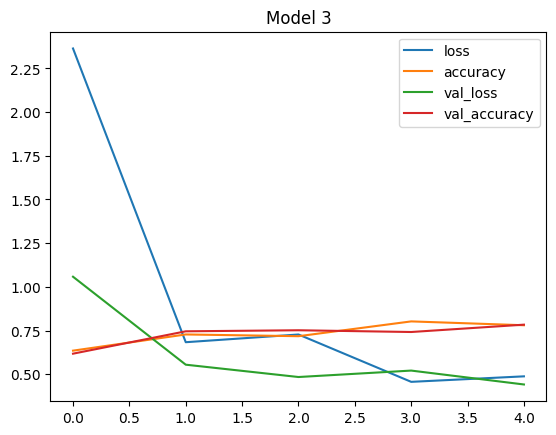

In [131]:
#Plotting
pd.DataFrame(history3.history).plot(title="Model 3")

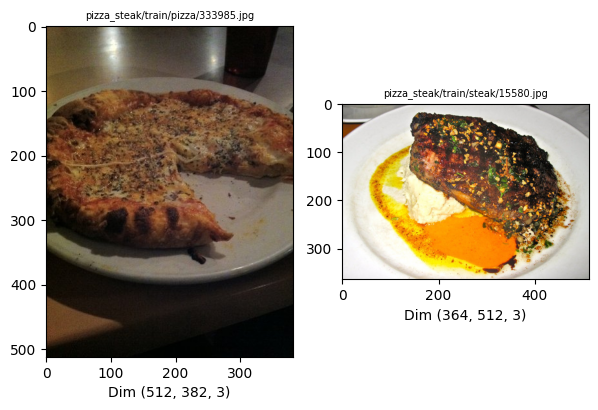

In [132]:
## Visualize
img1 = viewData(path1, path2)

In [133]:
images,labels = train_data.next()

(<matplotlib.image.AxesImage at 0x7fb000220280>, 0.0)

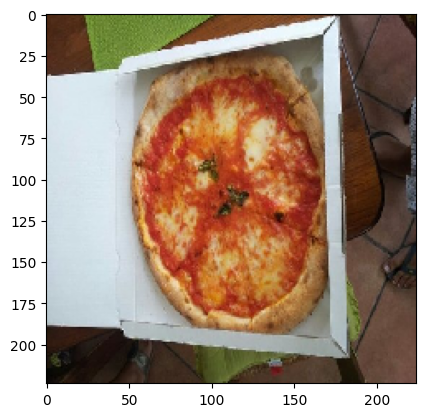

In [134]:
plt.imshow(images[10]), labels[10]

**Labels**

**0 - Pizza**

**1 - Steak**

In [135]:
images[0].shape

(224, 224, 3)

In [136]:
# Model - 4
tf.random.set_seed(42)

model4 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model4.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer= tf.keras.optimizers.Adam(),
               metrics=["accuracy"])


history4 = model4.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data = valid_data,
           validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 118ms/step - loss: 0.9369 - accuracy: 0.6900 - val_loss: 0.4819 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4172 - accuracy: 0.8173 - val_loss: 0.4077 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3537 - accuracy: 0.8620 - val_loss: 0.4875 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.1908 - accuracy: 0.9393 - val_loss: 0.5011 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.0614 - accuracy: 0.9820 - val_loss: 0.5622 - val_accuracy: 0.8020


In [137]:
model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_35 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_36 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_12 (Flatten)        (None, 475240)            0         
                                                                 
 dense_18 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<Axes: title={'center': 'Model4'}>

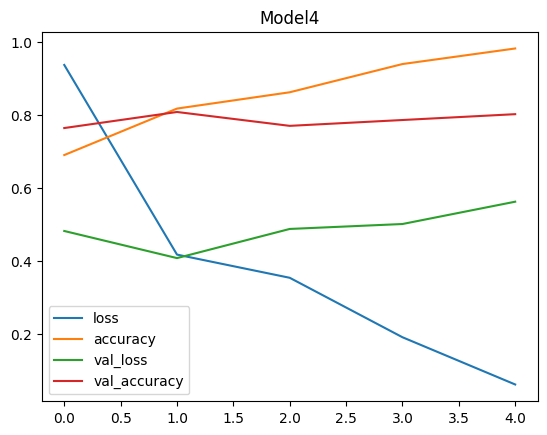

In [138]:
pd.DataFrame(history4.history).plot(title="Model4")

**Model is learning good but performance on train data is not satisfactory**

**Validate loss** is increasing leading to **Overfitting** of the model

In [139]:
def plotThroughput(history):
  plt.figure(figsize=(17,5))
  plt.subplot(1,2,1)
  plt.title("Accuracy")
  plt.plot(history.history["accuracy"],c="b")
  plt.plot(history.history['val_accuracy'], c="g")
  plt.xlabel('Epochs')
  plt.legend();

  plt.subplot(1,2,2)
  plt.title("Loss")
  plt.plot(history.history['loss'], c='b')
  plt.plot(history.history['val_loss'], c='g')
  plt.xlabel("Epochs")
  plt.legend();

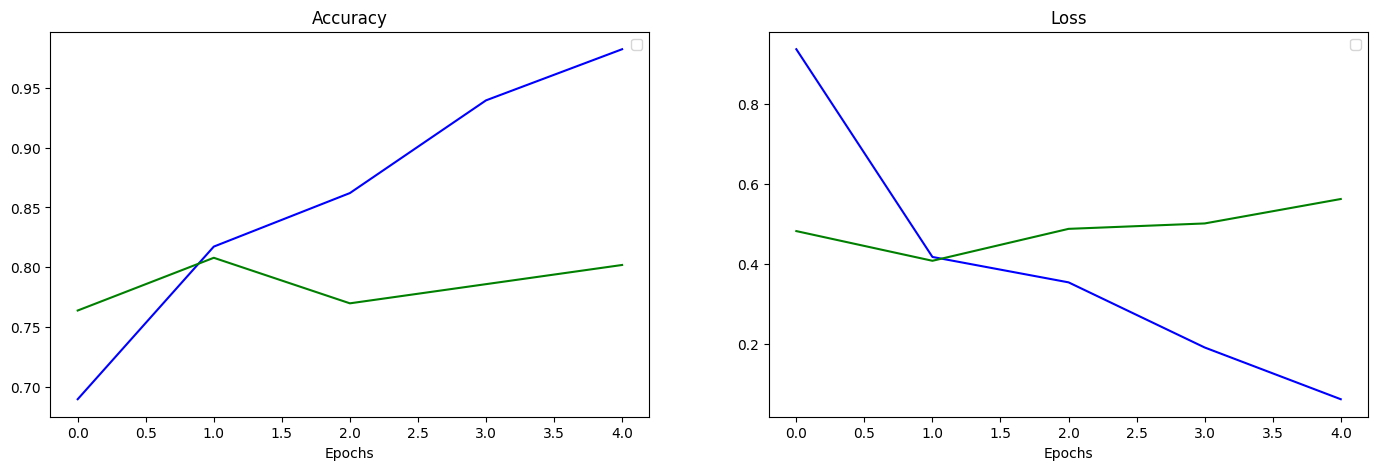

In [140]:
plotThroughput(history4)
# plt.plot(history4.history['accuracy'])
# plt.plot( history4.history['val_accuracy'])
# plt.legend()

**Let's Add MaxPool2D Layer**

## Model 5

In [141]:
tf.random.set_seed(42)

model5 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = "adam",
                metrics=["accuracy"])

history5 = model5.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data = valid_data,
           validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 131ms/step - loss: 0.5880 - accuracy: 0.6847 - val_loss: 0.3692 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4200 - accuracy: 0.8167 - val_loss: 0.3245 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.3756 - accuracy: 0.8353 - val_loss: 0.3205 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.3601 - accuracy: 0.8460 - val_loss: 0.3076 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3413 - accuracy: 0.8480 - val_loss: 0.3185 - val_accuracy: 0.8720


In [142]:
model5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 26, 26, 10)     

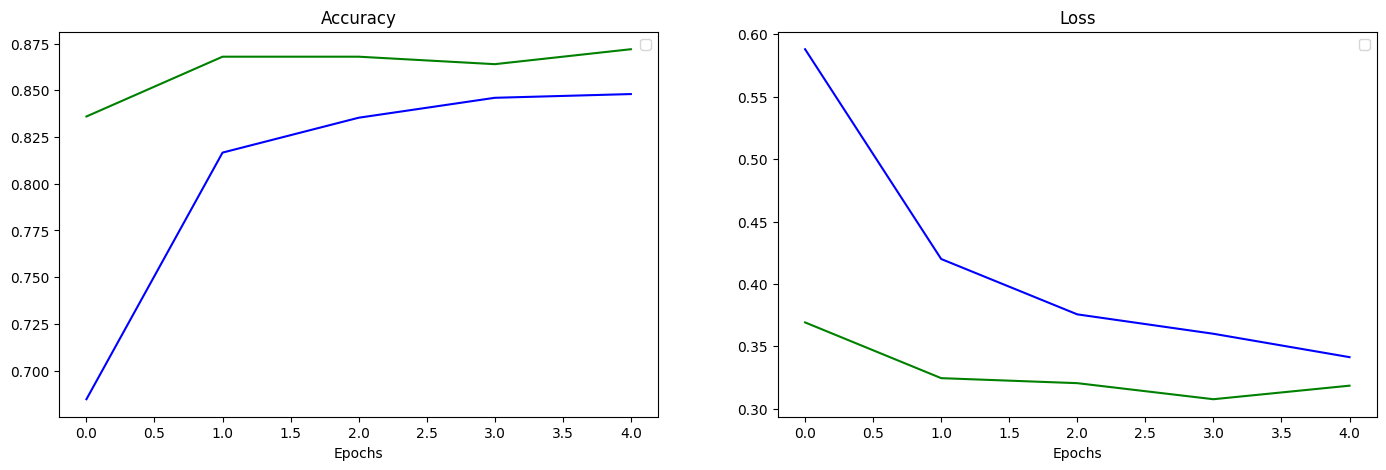

In [143]:
plotThroughput(history5)

- The loss is still high on training dataset.
- Model is performing worst in training dataset but better in validation dataset

## Use Data Augmentation to overcome **Overfitting**

In [317]:

data_augment = ImageDataGenerator(rescale=1/255.,
                                  rotation_range = 20,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True)

augdata_train = data_augment.flow_from_directory(
                                  train_path,
                                  target_size=(224,224),
                                  color_mode="rgb",
                                  classes=None ,
                                  shuffle=True,
                                  seed=42,
                                  class_mode="binary",
                                  batch_size=32

)

augdata_valid = data_augment.flow_from_directory(
                                  test_path,
                                  target_size=(224,224),
                                  color_mode="rgb",
                                  classes=None,
                                  shuffle=True,
                                  seed=42,
                                  class_mode="binary",
                                  batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [313]:
images, labels = augdata_train.next()

In [312]:
import random
def view_random_image(images):
    choice = random.randint(0, len(images))
    plt.imshow(images[choice])


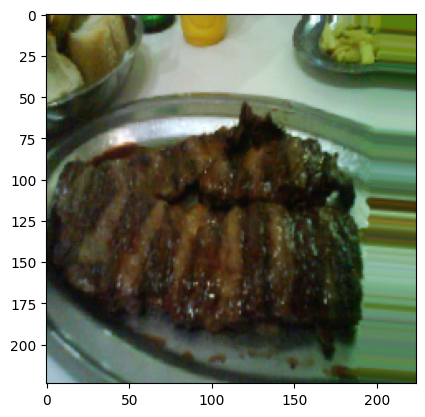

In [314]:
  view_random_image(images)

### Model 6


In [318]:
tf.random.set_seed(42)

model6  = Sequential([
        Conv2D(filters=4, kernel_size=3, activation="relu", input_shape=(224,224,3)),
        Conv2D(4,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(4,3 ,activation='relu'),
        Conv2D(4,3,activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation="sigmoid")
])

model6.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer = "adam",
               metrics=["accuracy"])

history6 = model6.fit(augdata_train,
                      epochs=5,
                      steps_per_epoch=len(augdata_train),
                      validation_data = augdata_valid,
                      validation_steps = len(augdata_valid))


Epoch 1/5
47/47 [==============================] - 27s 531ms/step - loss: 0.6363 - accuracy: 0.6393 - val_loss: 0.5619 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5136 - accuracy: 0.7467 - val_loss: 0.4314 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 25s 526ms/step - loss: 0.5299 - accuracy: 0.7467 - val_loss: 0.4498 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 26s 551ms/step - loss: 0.4727 - accuracy: 0.7747 - val_loss: 0.3826 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 25s 535ms/step - loss: 0.4571 - accuracy: 0.7960 - val_loss: 0.3729 - val_accuracy: 0.8440


In [319]:
model6.summary() # Trainable params is less i.e. equal to model1

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 222, 222, 4)       112       
                                                                 
 conv2d_105 (Conv2D)         (None, 220, 220, 4)       148       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 110, 110, 4)      0         
 g2D)                                                            
                                                                 
 conv2d_106 (Conv2D)         (None, 108, 108, 4)       148       
                                                                 
 conv2d_107 (Conv2D)         (None, 106, 106, 4)       148       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 53, 53, 4)        0         
 g2D)                                                

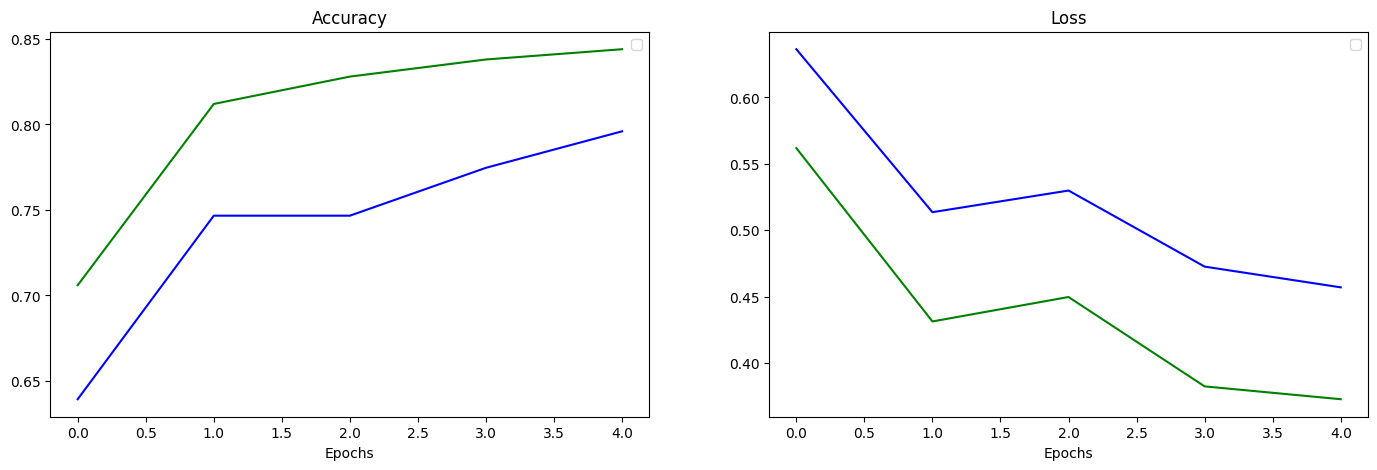

In [320]:
plotThroughput(history6)

In [165]:
## Looks Nice, Let's predict

In [321]:
from PIL import Image
def prepareData(img_path):
  img = Image.open(img_path).convert("RGB")
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  plt.imshow(img)
  return img

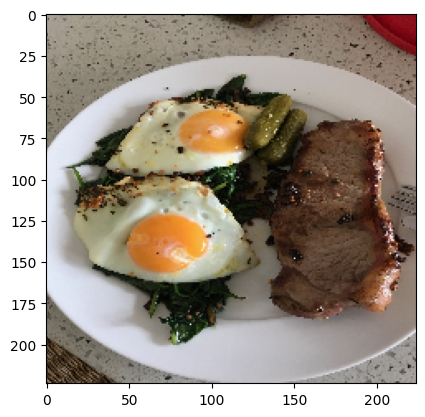

In [322]:
samp_ = prepareData("sample.jpeg")
samp = tf.expand_dims(samp_, axis=0) # Adding 1 layer

In [323]:
samp.shape

TensorShape([1, 224, 224, 3])

In [324]:
pred = int(tf.round(model6.predict(samp)[0][0]))

1/1 [==============================] - 0s 263ms/step


Text(0.5, 1.0, 'Predicted => steak')

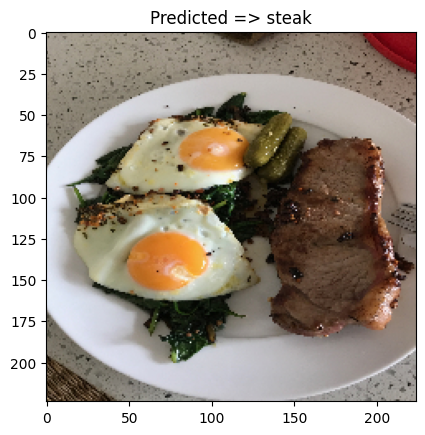

In [325]:
plt.imshow(samp_)
plt.title(f"Predicted => {class_names[pred]}")

**Create a function to randomly select an image & predict**

In [335]:
import random as rd

def predict_plot(model, path="pizza_steak/test/"):

  dir_choice  =  os.listdir(path)
  path += dir_choice[rd.randint(0,1)] + "/"
  img_choice = os.listdir(path)
  path += img_choice[rd.randint(0,len(img_choice)-1)]
  samp_ = prepareData(path)
  samp = tf.expand_dims(samp_, axis=0)
  pred_ = int(tf.round(model.predict(samp)[0][0]))
  plt.title(f"Predicted {dir_choice[pred_]}")
  plt.imshow(samp_)



1/1 [==============================] - 0s 22ms/step


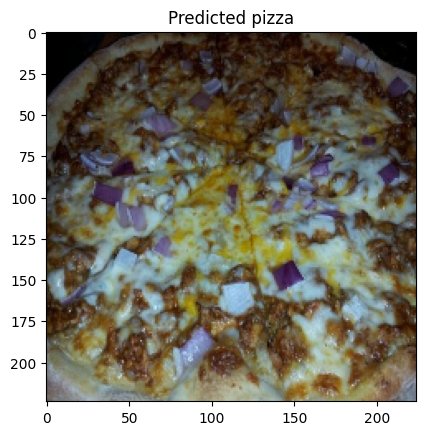

In [336]:
predict_plot(model6)

1/1 [==============================] - 0s 18ms/step


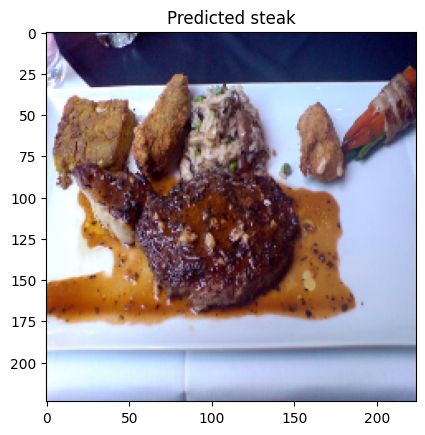

In [338]:
predict_plot(model6)